# Model with the kNN method

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Reading DataSet

In [5]:
#Leer el archivo en un pantas dataset
df  = pd.read_csv('../data_sets/Advertising.csv')

In [6]:
#Echamos un vistazo rapido al data set
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
#Elimino la columna innecesaria (index duplicado)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
#Predictor data ('TV')
x = df[['TV']]

#Response data ('Sales')
y = df[['Sales']]

## Train-Test split

In [9]:
#Split data into test_data (40%) and train_data (60%)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=66)

In [10]:
#Chosing k range
k_value_min = 1
k_value_max = 70

#Create a list of integer k values between the min and max
k_list = np.linspace(k_value_min, k_value_max, num=70, dtype=int)

##  Model fit

c:\Users\Saul-\Documents\python\data_science\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Saul-\Documents\python\data_science\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Saul-\Documents\python\data_science\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


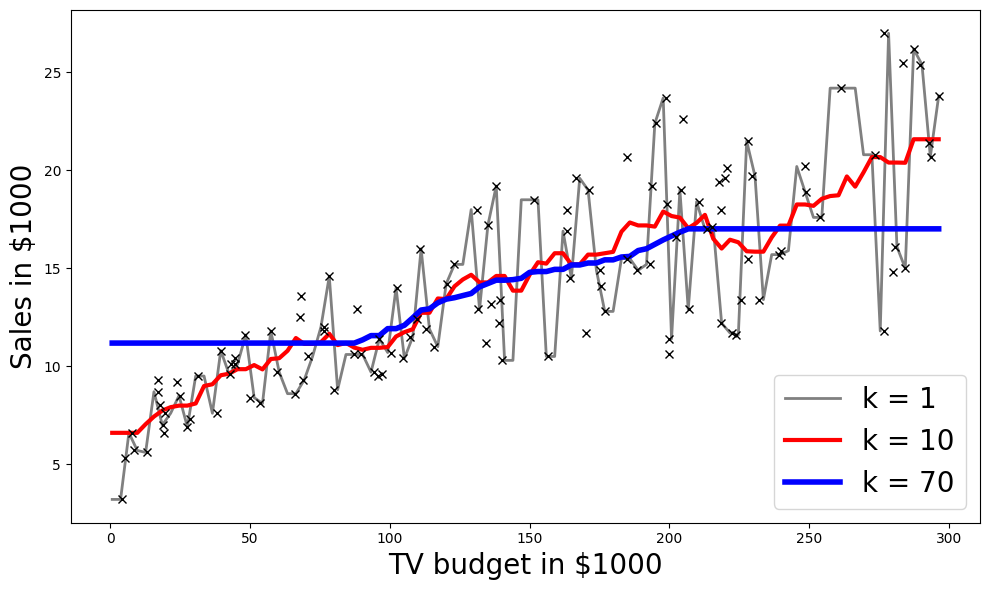

In [11]:
#Set up a grid data for plotting the data and predictions
fig, ax = plt.subplots(figsize=(10,6))

#Create a diccionary to store the k value against MSE fit {k: MSE@k}
knn_dict = {}

#Variable for alterning the linewith of values kNN models
j=0

#Loop over all k values
for k_value in k_list:

    #Create a Knn Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))

    #Fit the model on the train data
    model.fit(x_train, y_train)

    #Use the trained model to predict on the test data
    y_pred = model.predict(x_test)

    #Calculate de MSE of the test data predictions
    MSE = mean_squared_error(y_test, y_pred)

    #Storage the MSE values for each k value in the dictionary
    knn_dict[k_value] = MSE

    #Helper code to plot the data an various kNN model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(), x.max(),100).reshape(-1, 1)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds, '-', label = f'k = {int(k_value)}', color=colors[j], linewidth = j+2)
        j+=1
    
ax.legend(loc='lower right', fontsize=20)
ax.plot(x_train, y_train, 'x', label='test', color='k')
ax.set_xlabel('TV budget in $1000', fontsize=20)
ax.set_ylabel('Sales in $1000', fontsize=20)
plt.tight_layout()

## Graph plot

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

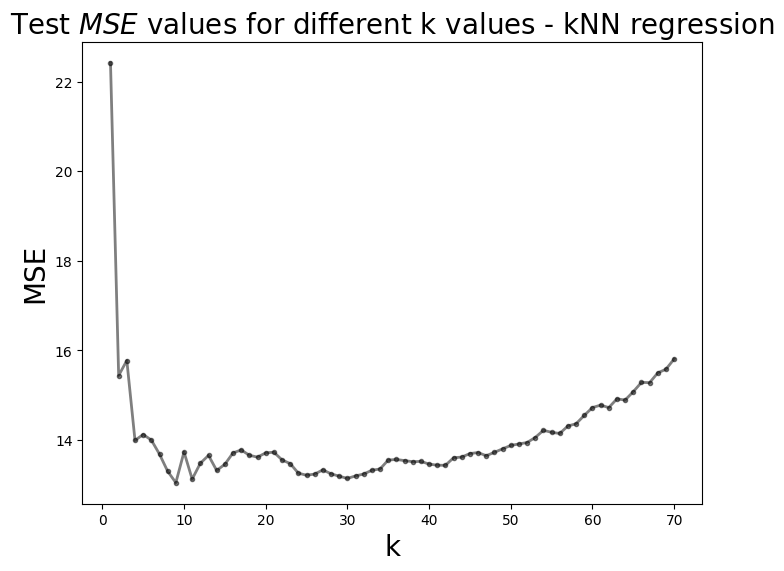

In [12]:
#Plot a graph which depicts the relation between k values and MSE
plt.figure(figsize=(8,6))
plt.plot(knn_dict.keys(), knn_dict.values(), 'k.-', alpha=0.5, linewidth=2)

#Set title and axis labels\
plt.title('Test $MSE$ values for different k values - kNN regression', fontsize=20)
plt.xlabel('k', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.tight_layout

In [13]:
#Find the lowest MSE among all the kNN models
min_mse = min(knn_dict.values())

#Using list comprehesions to find the k value associated with the lowest MSE
best_model = [key for (key, value) in knn_dict.items() if value == min_mse]

#Print the best k-value
print(f'The best k value is {best_model}, with a MSE of {min_mse}')

The best k value is [np.int64(9)], with a MSE of 13.046766975308643


## Fitness Model

In [14]:
#Helper code to compute the R2_score of the best model
model = KNeighborsRegressor(n_neighbors=best_model[0])
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)

print(f'The R2 score of the model is {r2_score(y_test, y_pred_test)}')

The R2 score of the model is 0.5492457002030715
